In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df_train=pd.read_csv('train-data.csv')


In [3]:
df_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df_train.shape

(6019, 14)

In [5]:
df_train.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
df_train.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [7]:
df_train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [8]:
df_train.drop('Unnamed: 0',axis=1,inplace=True)
df_train.drop('New_Price',axis=1,inplace=True)


In [9]:
df_train.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
count,6019,6019,6019,6019,6019,6017,5983,5983
unique,1876,11,5,2,4,442,146,372
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp
freq,49,790,3205,4299,4929,172,606,235


In [10]:
miss_percent = (df_train.isnull().sum() / len(df_train)) * 100
miss_percent

Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.033228
Engine               0.598106
Power                0.598106
Seats                0.697790
Price                0.000000
dtype: float64

In [11]:
col=['Mileage','Engine','Power']
for i in col:
    new = df_train[i].str.split(" ", n = 1, expand = True) 
    df_train[i]= new[0] 
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [12]:
new = df_train['Name'].str.split(" ", n = 1, expand = True) 
df_train['Name']= new[0]

In [13]:
def fill_na_with_mode(ds, brandname):
  fill_value = ds.loc[ds['Name'] == brandname]['Seats'].mode()[0]
  condit = ((ds['Name'] == brandname) & (ds['Seats'].isnull()))
  ds.loc[condit, 'Seats'] = ds.loc[condit, 'Seats'].fillna(fill_value)

In [14]:
car_brand = ['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini']

for c in car_brand:
  fill_na_with_mode(df_train, c)


In [15]:
def fill_na_with_mode(ds, brandname, colname):
  fill_value = ds.loc[ds['Name'] == brandname][colname].mode()[0]
  condit = ((ds['Name'] == brandname) & (ds[colname].isnull()))
  ds.loc[condit, colname] = ds.loc[condit, colname].fillna(fill_value)

In [16]:
mileage_col = df_train.loc[df_train['Mileage'].isnull()]['Name'].unique()
engine_col = df_train.loc[df_train['Engine'].isnull()]['Name'].unique()
power_col = df_train.loc[df_train['Power'].isnull()]['Name'].unique()

for x in mileage_col:
  fill_na_with_mode(df_train, x, 'Mileage')
for y in engine_col:
  fill_na_with_mode(df_train, y, 'Engine')
for z in power_col:
  fill_na_with_mode(df_train, z, 'Power')

In [17]:
df_train.shape

(6019, 12)

In [18]:
m=df_train['Power']!='null'
df_train=df_train[m]


In [19]:
for i in col:
    df_train[i]=df_train[i].astype('float')

In [20]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [21]:
df_train['Year']=2020-df_train['Year']
df_train.rename(columns = {"Year": "Age"},inplace=True) 
df_train.head()

,Name,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,10,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,5,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,9,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,8,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,7,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [22]:
df_train=df_train[df_train['Mileage']!=0]
df_train.describe()

,Age,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,6.534911,5.836682e+04,18.355119,1621.940395,113.078449,5.284060,9.528243
std,3.176220,9.217074e+04,4.183091,598.453470,53.775406,0.805384,11.169513
min,1.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000,0.440000
25%,4.000000,3.351275e+04,15.300000,1198.000000,75.000000,5.000000,3.500000
50%,6.000000,5.260900e+04,18.275000,1495.000000,94.000000,5.000000,5.700000
75%,8.000000,7.246600e+04,21.100000,1984.000000,138.100000,5.000000,10.000000
max,22.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [23]:
df_train=df_train[df_train['Seats']!=0]

In [24]:
df_train['Seats']=df_train['Seats'].astype('object')


In [25]:
df_train.drop(columns=['Location'], axis=1, inplace=True)


In [26]:
df_train = pd.get_dummies(df_train, drop_first=True)


In [27]:
df_train.dtypes

Age                            int64
Kilometers_Driven              int64
Mileage                      float64
Engine                       float64
Power                        float64
Price                        float64
Name_Audi                      uint8
Name_BMW                       uint8
Name_Bentley                   uint8
Name_Chevrolet                 uint8
Name_Datsun                    uint8
Name_Fiat                      uint8
Name_Force                     uint8
Name_Ford                      uint8
Name_Honda                     uint8
Name_Hyundai                   uint8
Name_ISUZU                     uint8
Name_Isuzu                     uint8
Name_Jaguar                    uint8
Name_Jeep                      uint8
Name_Lamborghini               uint8
Name_Land                      uint8
Name_Mahindra                  uint8
Name_Maruti                    uint8
Name_Mercedes-Benz             uint8
Name_Mini                      uint8
Name_Mitsubishi                uint8
N

In [28]:
#df_train=pd.get_dummies(df_train,prefix_sep='_',columns=['Location','Fuel_Type','Transmission','Owner_Type','Seats'],drop_first=True)

In [29]:
#df_test=pd.get_dummies(df_test,prefix_sep='_',columns=['Location','Fuel_Type','Transmission','Owner_Type','Seats'],drop_first=True)

In [30]:
df_train['Price'].skew()

3.3719552545612768

In [31]:
df_train['Price'].kurtosis()

17.50338719541899

In [32]:
# sns.pairplot(df_train,diag_kind='kde')

In [33]:
# sns.pairplot(df_train[['Kilometers_Driven','Mileage','Engine','Power','Price']],diag_kind='kde')

In [34]:
import statsmodels.api as sm

In [35]:
from sklearn.model_selection import train_test_split as tts

In [36]:
df=df_train

In [37]:
x=df.drop('Price',1)
y=df['Price']

In [38]:
X_train,X_test,Y_train,Y_test=tts(x,y,test_size=0.3,random_state=2)

In [39]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [40]:
model=lr.fit(X_train,Y_train)

In [41]:
df_train.columns

Index(['Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price',
       'Name_Audi', 'Name_BMW', 'Name_Bentley', 'Name_Chevrolet',
       'Name_Datsun', 'Name_Fiat', 'Name_Force', 'Name_Ford', 'Name_Honda',
       'Name_Hyundai', 'Name_ISUZU', 'Name_Isuzu', 'Name_Jaguar', 'Name_Jeep',
       'Name_Lamborghini', 'Name_Land', 'Name_Mahindra', 'Name_Maruti',
       'Name_Mercedes-Benz', 'Name_Mini', 'Name_Mitsubishi', 'Name_Nissan',
       'Name_Porsche', 'Name_Renault', 'Name_Skoda', 'Name_Tata',
       'Name_Toyota', 'Name_Volkswagen', 'Name_Volvo', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Seats_4.0', 'Seats_5.0', 'Seats_6.0', 'Seats_7.0',
       'Seats_8.0', 'Seats_9.0', 'Seats_10.0'],
      dtype='object')

In [42]:
yp=lr.predict(X_test)

In [43]:
lr.score(X_train,Y_train)

0.7720062126066661

In [44]:
lr.score(X_test,Y_test)

0.7805982788325349

In [45]:
from sklearn.metrics import accuracy_score,r2_score

In [46]:
xc=sm.add_constant(X_train)
model=sm.OLS(Y_train,xc).fit()
model.summary()

C:\Users\Arun\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     292.6
Date:                Tue, 21 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:33:26   Log-Likelihood:                -12640.
No. Observations:                4110   AIC:                         2.538e+04
Df Residuals:                    4062   BIC:                         2.568e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        34.5190      5.805      5.946      0.000      23.138      45.900
Age                          -1.0364      0.032    -31.975      0.000      -1.100      -0.973
Kilometers_Driven          3.366e-06   7.88e-07      4.273      0.000    1.82e-06    4.91e-06
Mileage                      -0.1534      0.039     -3.887      0.000      -0.231      -0.076
Engine                        0.0013      0.000      2.809      0.005       0.000       0.002
Power                         0.0737      0.005     14.826      0.000       0.064       0.083
Name_Audi                     0.1325      5.353      0.025      0.980     -10.362      10.627
Name_BMW                     -0.0752      5.360     -0.014      0.989     -10.584      10.433
Name_Bentley              -8.389e-12   1.44e-11     -0.584      0.559   -3.65e-11    1.98e-11
Name_Chevrolet               -8.9145      5.349     -1.667      0.096     -19.401       1.572
Name_Datsun                 -10.2874      5.616     -1.832      0.067     -21.298       0.724
Name_Fiat                    -8.9614      5.465     -1.640      0.101     -19.675       1.752
Name_Force                  -11.8342      6.143     -1.927      0.054     -23.877       0.209
Name_Ford                    -7.8216      5.331     -1.467      0.142     -18.273       2.630
Name_Honda                   -9.1597      5.334     -1.717      0.086     -19.617       1.297
Name_Hyundai                 -8.2628      5.329     -1.551      0.121     -18.710       2.184
Name_ISUZU                  -15.8046      7.495     -2.109      0.035     -30.498      -1.111
Name_Isuzu                   -8.8831      7.505     -1.184      0.237     -23.598       5.832
Name_Jaguar                   8.5665      5.453      1.571      0.116      -2.124      19.257
Name_Jeep                    -6.7113      5.534     -1.213      0.225     -17.561       4.138
Name_Lamborghini           7.789e-12   1.33e-11      0.585      0.559   -1.83e-11    3.39e-11
Name_Land                    15.7984      5.414      2.918      0.004       5.185      26.412
Name_Mahindra               -11.8677      5.342     -2.221      0.026     -22.342      -1.394
Name_Maruti                  -7.3157      5.329     -1.373      0.170     -17.764       3.132
Name_Mercedes-Benz            1.4411      5.349      0.269      0.788      -9.046      11.928
Name_Mini                     4.4456      5.491      0.810      0.418      -6.320      15.211
Name_Mitsubishi              -8.8937      5.499     -1.617      0.106     -19.675       1.887
Name_Nissan                  -8.8958      5.364     -1.659      0.097     -19.411       1.620
Name_Porsche                  5.9221      5.675      1.044      0.297      -5.203      17.048
Name_Renault                 -9.1341      5.349     -1.708      0.088     -

C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


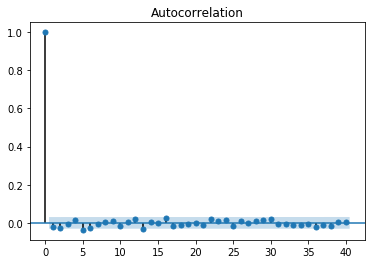

In [47]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(model.resid, lags=40 , alpha=0.05)
acf.show()

In [48]:
from scipy import stats
print(stats.jarque_bera(model.resid))

(666712.0651039158, 0.0)


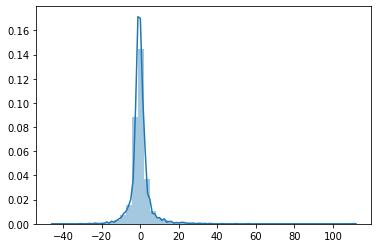

In [49]:
import seaborn as sns

sns.distplot(model.resid)

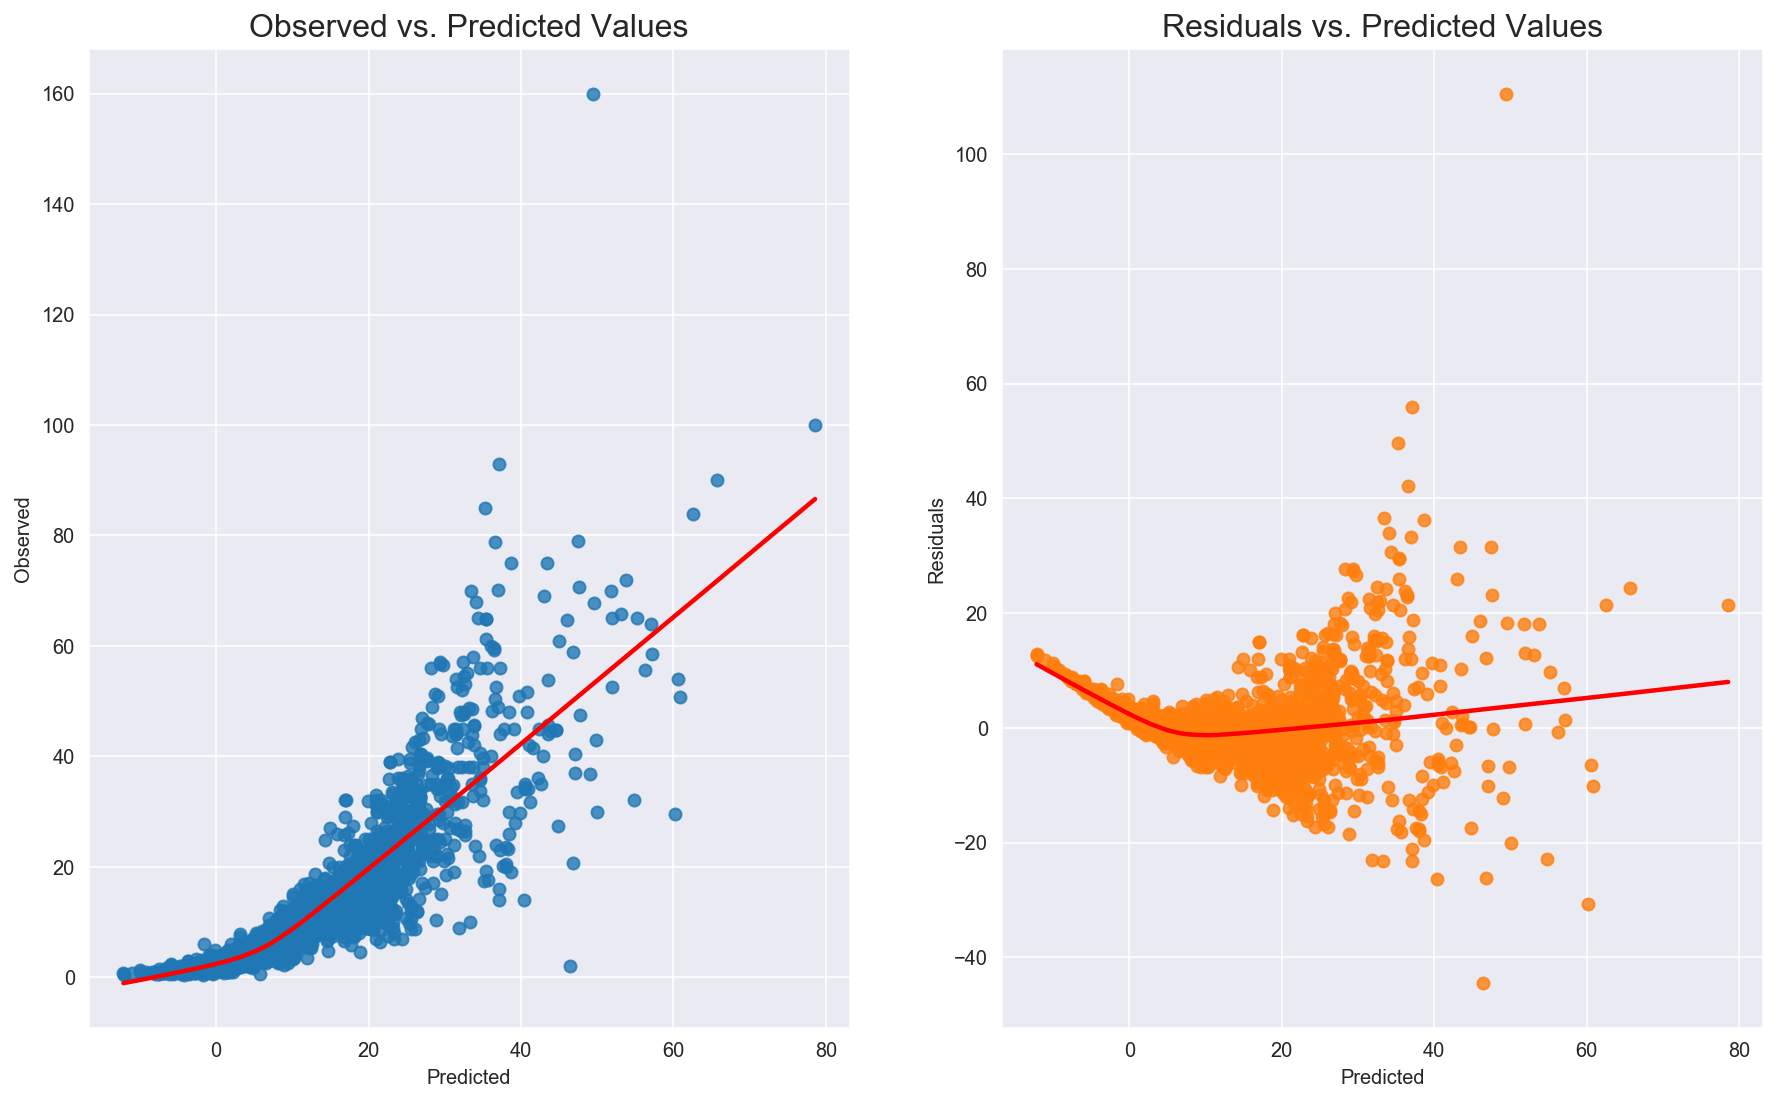

In [50]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=Y_train, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(model, Y_train) 

In [51]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=model, frac=0.5)

(1.2878484904129444, 6.31524228188749e-09)

C:\Users\Arun\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:695: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
C:\Users\Arun\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Arun\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Arun\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


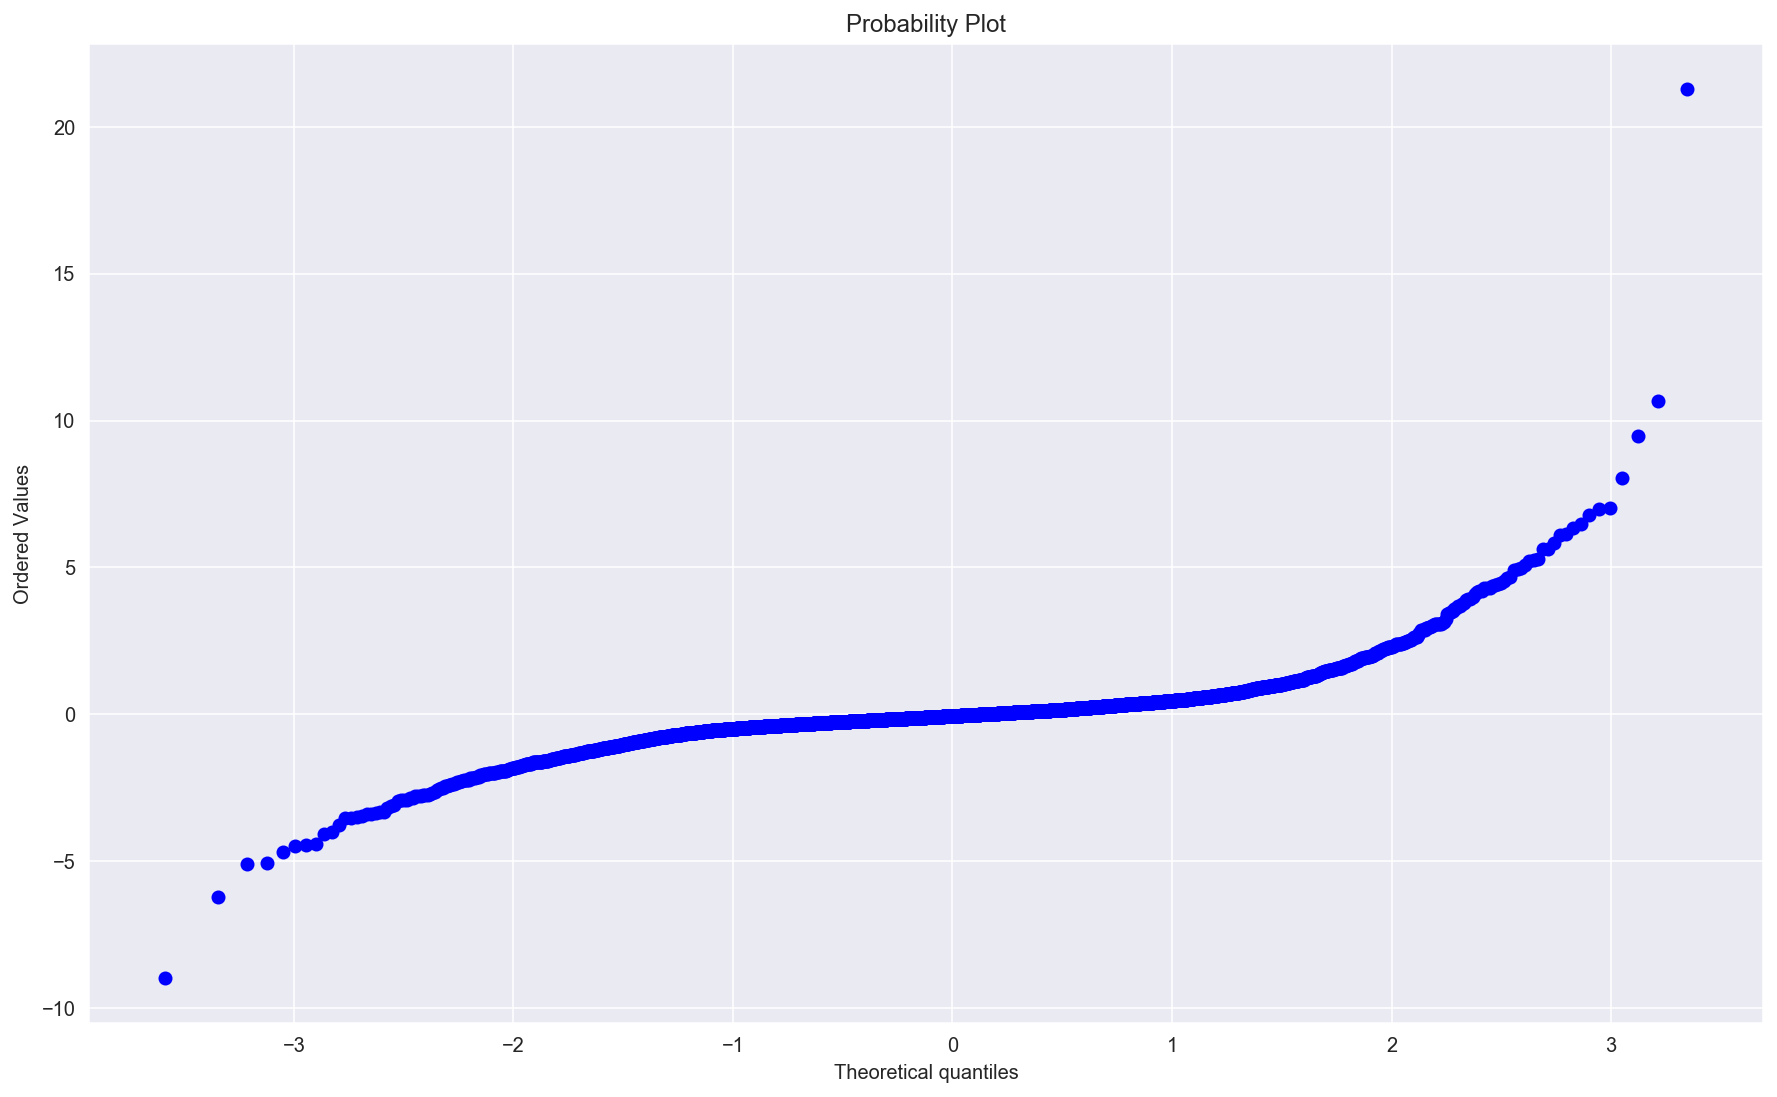

In [52]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = model.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [53]:
model.resid.mean()

-7.568706969624607e-11

[('F statistic', 0.8319031376262753), ('p-value', 0.9999811718832641)]

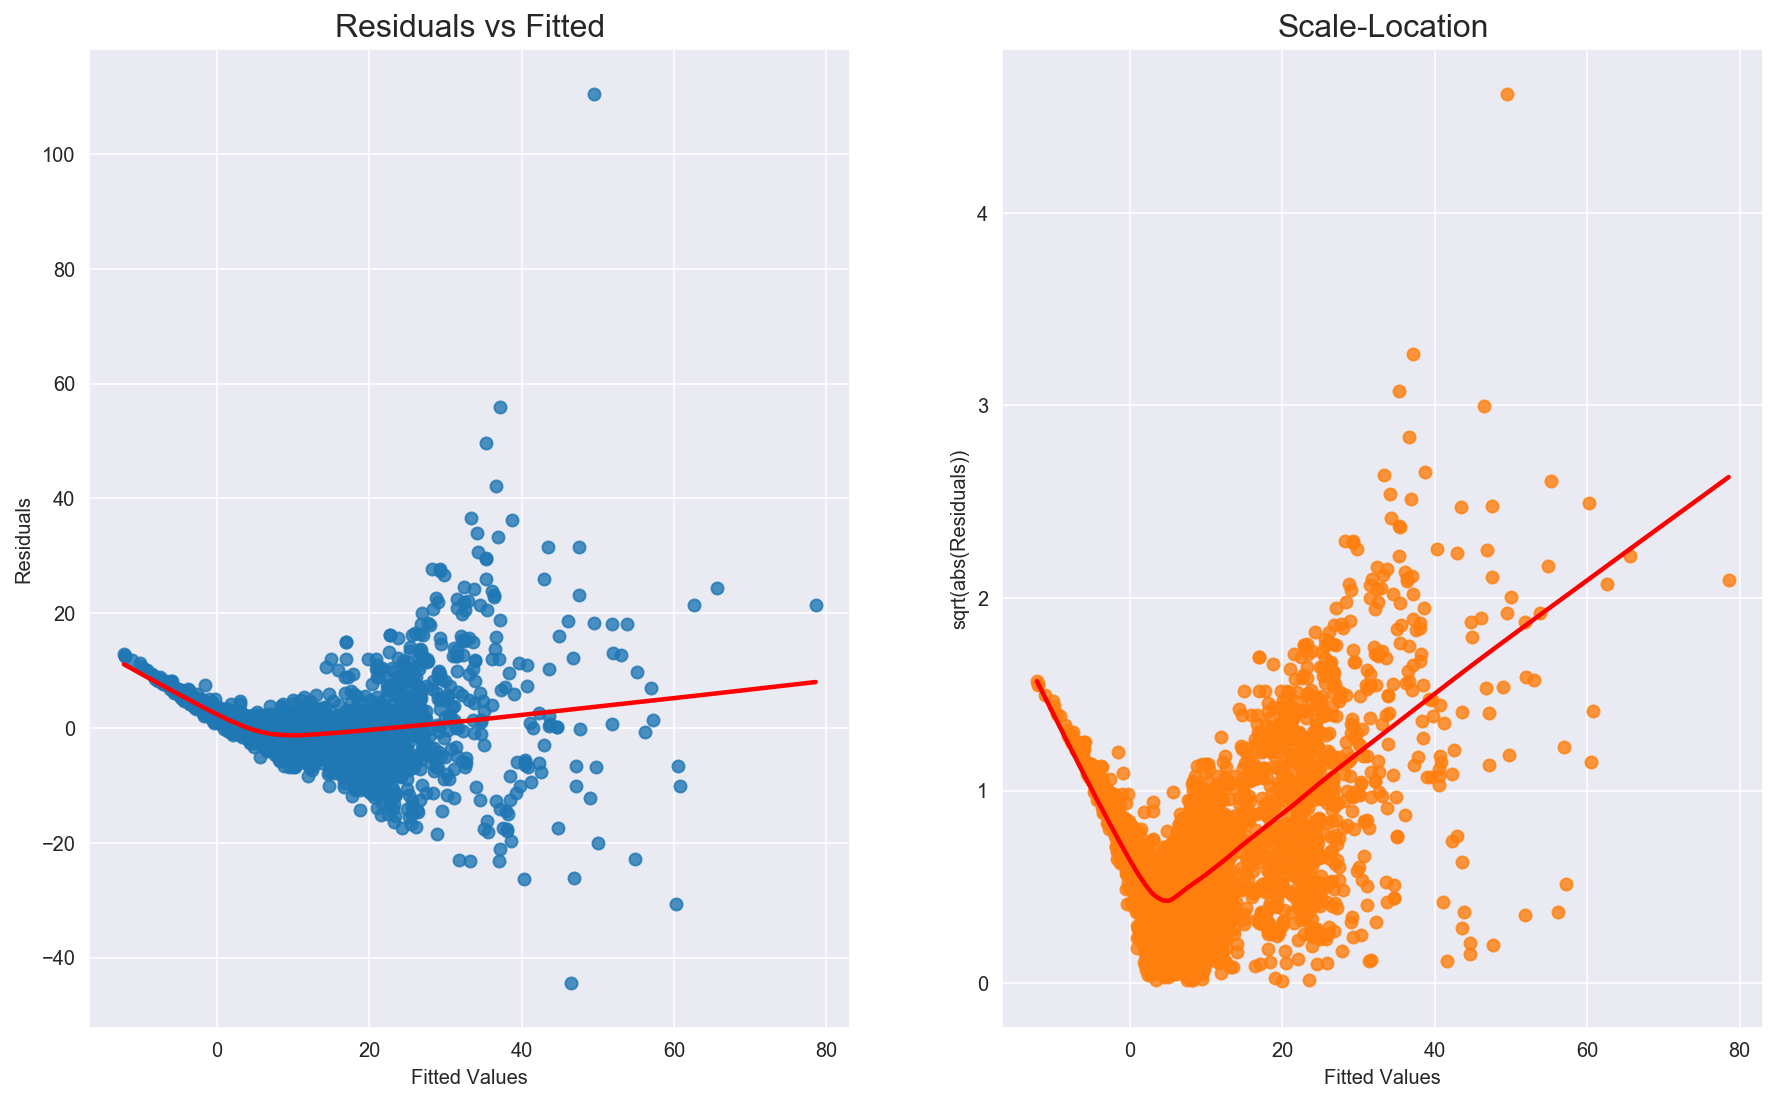

In [54]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

In [55]:
df_train[['Kilometers_Driven','Mileage','Engine','Power','Price']]=np.log(df_train[['Kilometers_Driven','Mileage','Engine','Power','Price']]+0.1)

In [56]:
df_train['Price'].kurtosis()

0.1988321022351407

In [57]:
df_train['Price'].skew()

0.4894540123126729

In [58]:
df=df_train
x=df.drop('Price',1)
y=df['Price']
X_train,X_test,Y_train,Y_test=tts(x,y,test_size=0.3,random_state=2)

In [59]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


rr = Ridge(alpha=1) 
rr.fit(X_train,Y_train)
train_score=rr.score(X_train,Y_train)
test_score=rr.score(X_test,Y_test)
print("training score:", train_score)
print("test score:", test_score)

training score: 0.9247691344826975
test score: 0.91719473970206


In [60]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,Y_train)
train_score=lasso.score(X_train,Y_train)
test_score=lasso.score(X_test,Y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score)
print("test score:", test_score)
print("number of features used: ", coeff_used)

training score: 0.8782795646328642
test score: 0.8682263168968829
number of features used:  13


In [61]:
from sklearn.model_selection import GridSearchCV
lambdas=np.linspace(0.0001,0.001,1)
model=Lasso(fit_intercept=True)
params={'alpha':lambdas}
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')
grid_search.fit(X_train,Y_train)
gr=grid_search.best_estimator_


In [62]:
train_score=lasso.score(X_train,Y_train)
test_score=lasso.score(X_test,Y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score)
print("test score:", test_score)
print("number of features used: ", coeff_used)

training score: 0.8782795646328642
test score: 0.8682263168968829
number of features used:  13


In [63]:

model=lr.fit(X_train,Y_train)
lr.score(X_train,Y_train)


0.9251537165367159

In [64]:
lr.score(X_test,Y_test)

0.918882459457999

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(xc.values, i) for i in range(xc.shape[1])]
d=pd.DataFrame({'vif': vif[1:]}, index=X_train.columns)

C:\Users\Arun\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [66]:
d.sort_values('vif')

,vif
Owner_Type_Fourth & Above,1.013631
Kilometers_Driven,1.042991
Fuel_Type_Electric,1.079530
Owner_Type_Third,1.100376
Owner_Type_Second,1.132804
Fuel_Type_LPG,1.135133
Seats_10.0,1.251870
Seats_9.0,1.253666
Age,1.568294
Name_ISUZU,2.020228


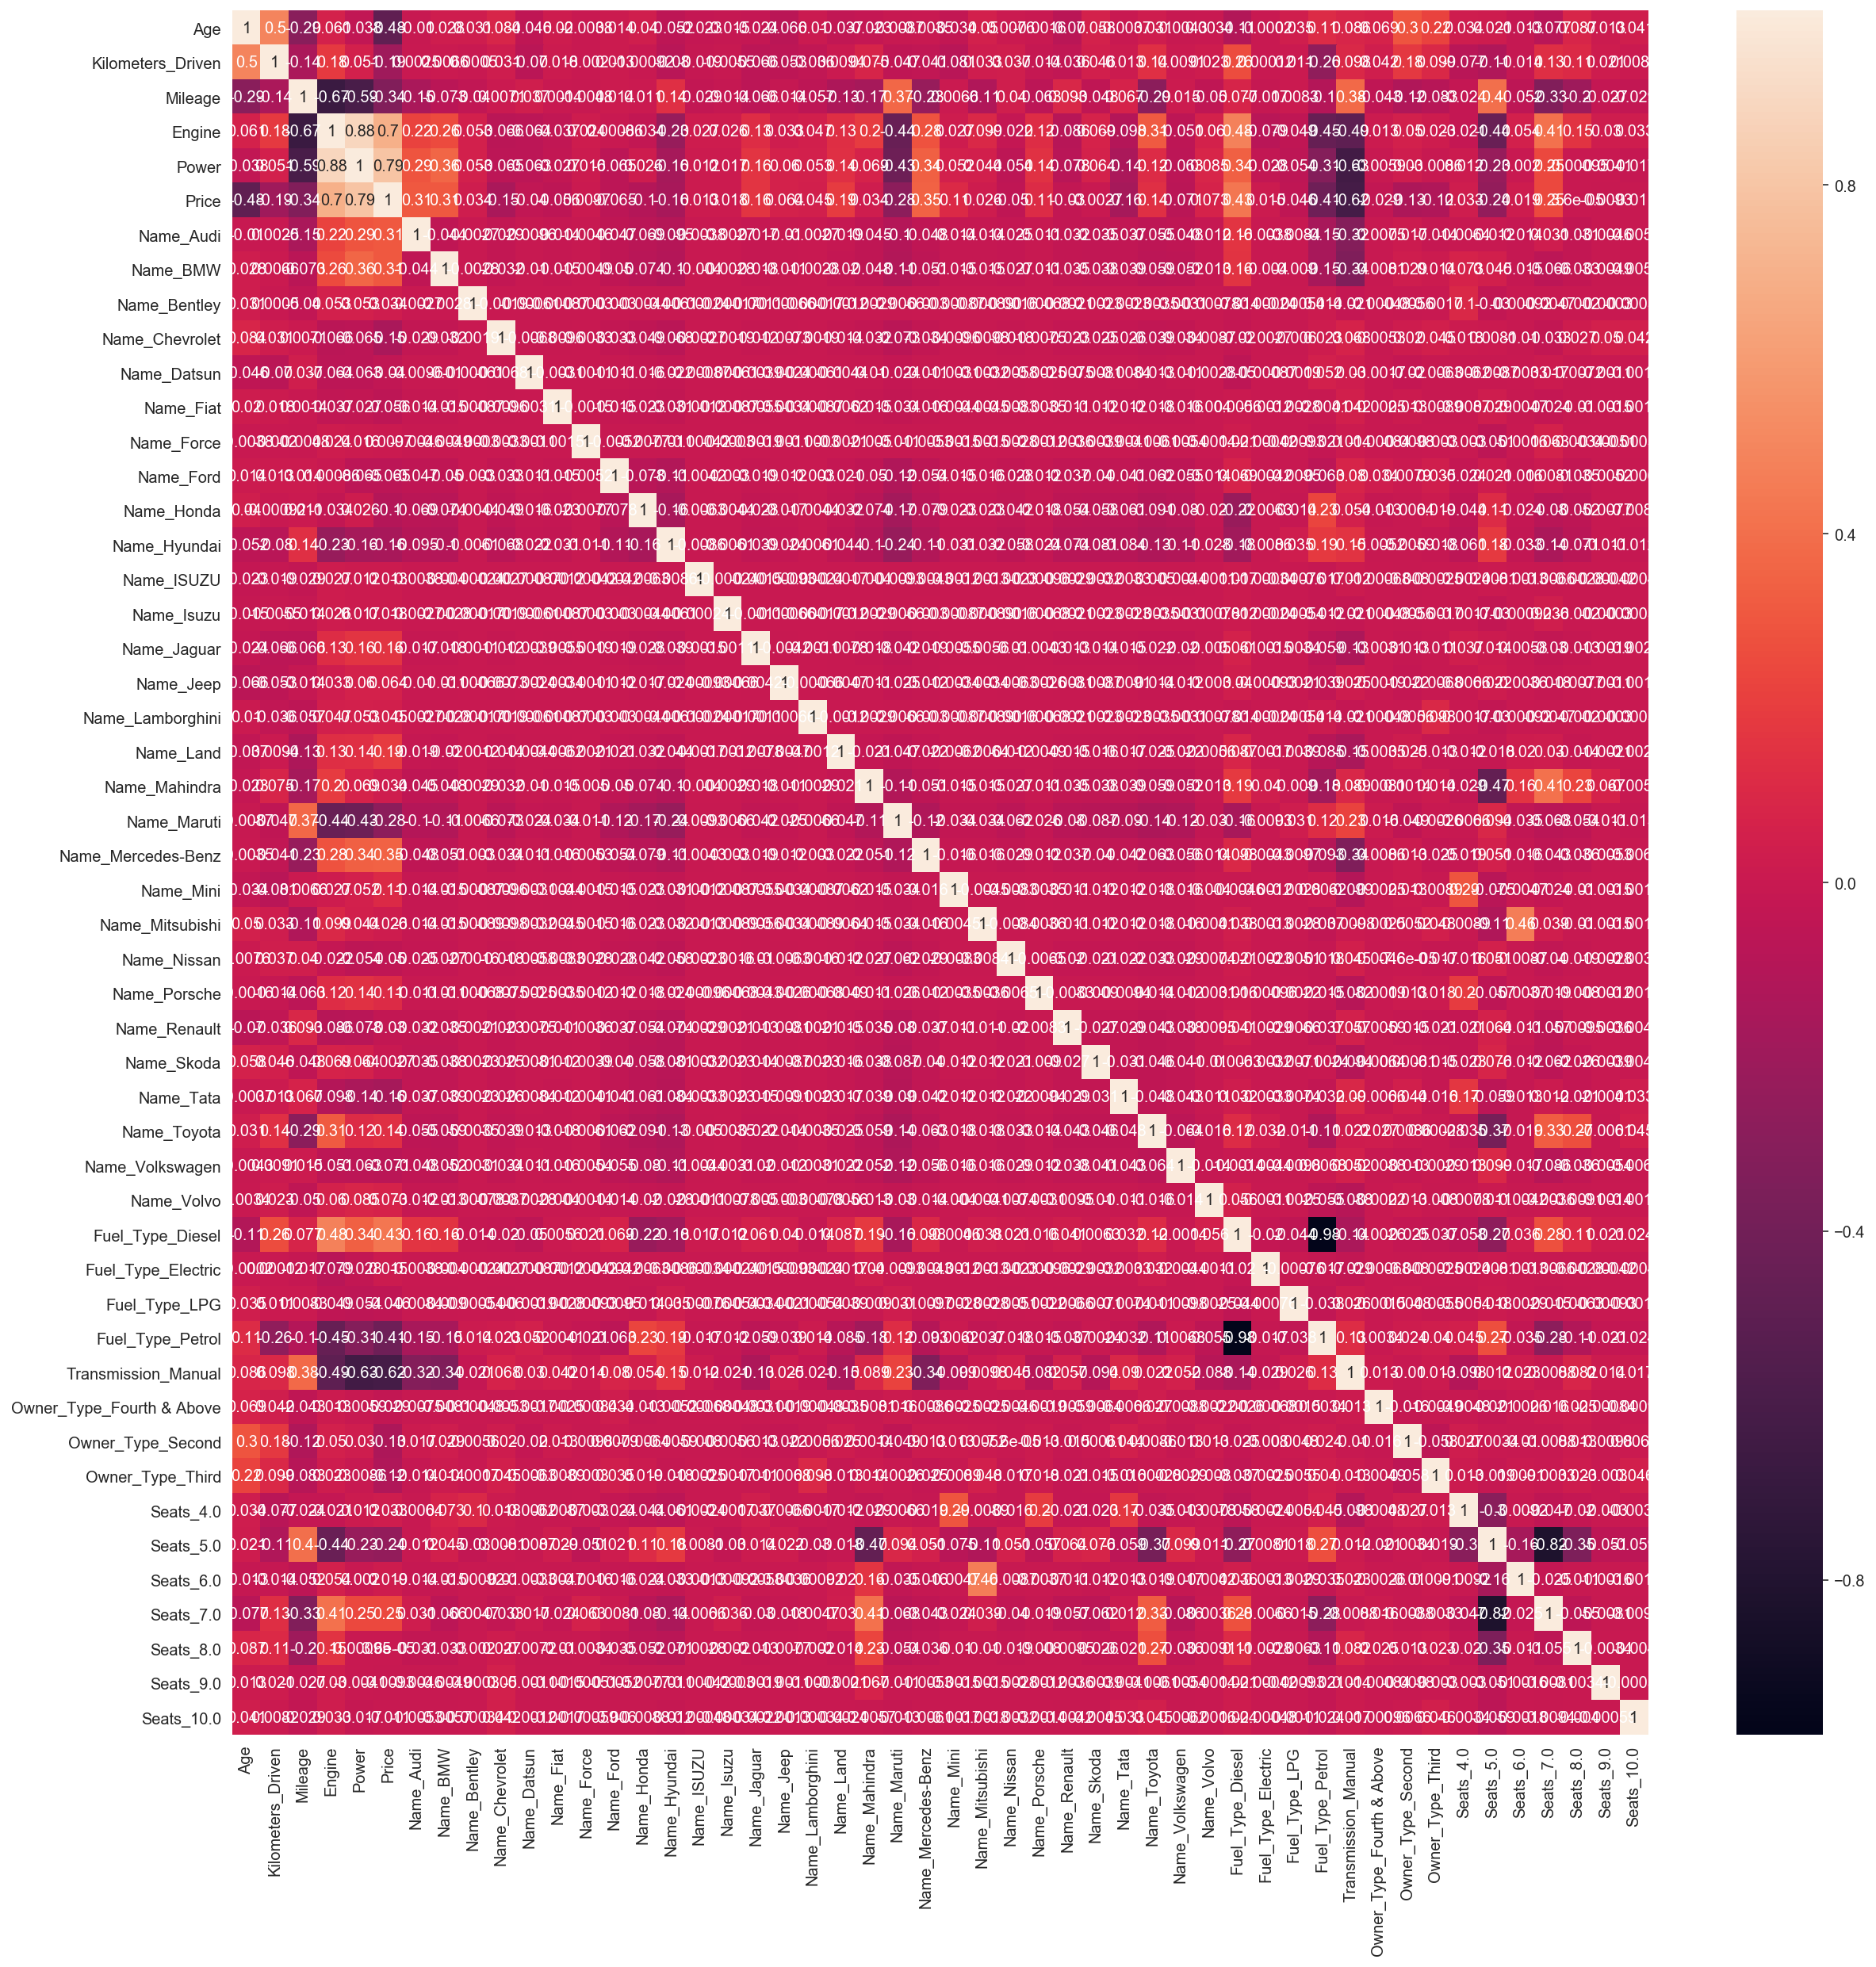

In [67]:
sns.mpl.rcParams['figure.figsize'] = (20,20)
cor=df_train.corr()
sns.heatmap(cor, annot=True)

In [68]:
cor_target = abs(cor["Price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

Age                    0.484250
Engine                 0.695816
Power                  0.792362
Price                  1.000000
Fuel_Type_Diesel       0.430401
Fuel_Type_Petrol       0.414034
Transmission_Manual    0.618760
Name: Price, dtype: float64

In [69]:
from sklearn.feature_selection import RFE
rfe = RFE(model, 11)
X_rfe = rfe.fit_transform(X_train,Y_train)  
#Fitting the data to model
model.fit(X_rfe,Y_train)
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True False False False  True False  True  True
 False  True False False False False False False  True False False False
  True False False False False  True  True False False False False  True
 False False False False False False False False False False False False
 False]
[27 35  1 18  1 32 31 38  1  7  1  1  6  1  3 16 14 15 23 39  1  9  5 33
  1 12  2 26  8  1  1 13  4 19 20  1 25 37 28 34 30 29 11 10 21 24 22 17
 36]


In [70]:
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = tts(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 11
Score with 11 features: 0.713806


In [71]:
cols = list(x.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 11)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Mileage', 'Power', 'Name_Chevrolet', 'Name_Fiat', 'Name_Force',
       'Name_Honda', 'Name_Lamborghini', 'Name_Land', 'Name_Skoda',
       'Name_Tata', 'Fuel_Type_Electric'],
      dtype='object')
